In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Datasets\ML datasets\Mobile phone price.csv')

In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.shape

(407, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
df.nunique()

Brand                      16
Model                     239
Storage                    13
RAM                        20
Screen Size (inches)       41
Camera (MP)               143
Battery Capacity (mAh)     48
Price ($)                  89
dtype: int64

In [8]:
df['Price ($)'].value_counts()

$149     18
$199     15
$279     15
$299     14
699      13
         ..
$309      1
$389      1
259       1
$109      1
1049      1
Name: Price ($), Length: 89, dtype: int64

In [9]:
 df['Price ($)'] = df['Price ($)'].str.replace('$', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_10296\3320819283.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price ($)'] = df['Price ($)'].str.replace('$', '')


In [10]:
 df['Price ($)'] = df['Price ($)'].str.replace(',', '')

In [11]:
df['Price ($)'] = df['Price ($)'].astype(float)

In [12]:
cat_features = df.select_dtypes(exclude = ['int', float])
cat_features.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)'],
      dtype='object')

In [13]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999.0
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199.0
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899.0
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279.0
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799.0
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049.0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349.0
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099.0
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429.0


In [14]:
df['Screen Size (inches)'] = df['Screen Size (inches)'].str.replace(' (unfolded)', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_10296\1354173201.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Screen Size (inches)'] = df['Screen Size (inches)'].str.replace(' (unfolded)', '')


In [15]:
df['Screen Size (inches)'] = df['Screen Size (inches)'].str.split(' +').str[0].astype(float)

In [16]:
df = df.rename(columns = {'RAM ': 'RAM', 'Storage ': 'Storage'})

In [17]:
df['RAM'] = df['RAM'].str.replace('GB', '').str.strip().astype('int')

In [18]:
df['Storage'] = df['Storage'].str.replace('GB', '').str.strip().astype('int')

In [19]:
df['Camera (MP)'].value_counts()

13MP + 2MP + 2MP          29
48MP + 8MP + 2MP + 2MP    16
48+8+2+2                  13
13MP + 2MP                11
64MP + 8MP + 2MP          11
                          ..
13MP + 5MP + 2MP + 2MP     1
8MP                        1
48MP + 8MP + 5MP + 2MP     1
13MP                       1
48+13+8+2                  1
Name: Camera (MP), Length: 143, dtype: int64

In [20]:
df['Camera (MP)'] = df['Camera (MP)'].str.split('+').str[0]

In [21]:
df['Camera (MP)'] = df['Camera (MP)'].str.replace('MP', '').str.strip().astype(float)

In [22]:
df['Model'].value_counts()

Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: Model, Length: 239, dtype: int64

In [23]:
df.drop('Model', axis = 1, inplace = True)

In [24]:
df.duplicated().sum()

82

In [25]:
df = df.drop_duplicates()

In [26]:
df.shape

(325, 7)

In [27]:
df.dtypes

Brand                      object
Storage                     int32
RAM                         int32
Screen Size (inches)      float64
Camera (MP)               float64
Battery Capacity (mAh)      int64
Price ($)                 float64
dtype: object

In [28]:
num_features = df.select_dtypes(exclude = ['object'])
num_features.columns

Index(['Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

array([[<Axes: title={'center': 'Storage'}>,
        <Axes: title={'center': 'RAM'}>],
       [<Axes: title={'center': 'Screen Size (inches)'}>,
        <Axes: title={'center': 'Camera (MP)'}>],
       [<Axes: title={'center': 'Battery Capacity (mAh)'}>,
        <Axes: title={'center': 'Price ($)'}>]], dtype=object)

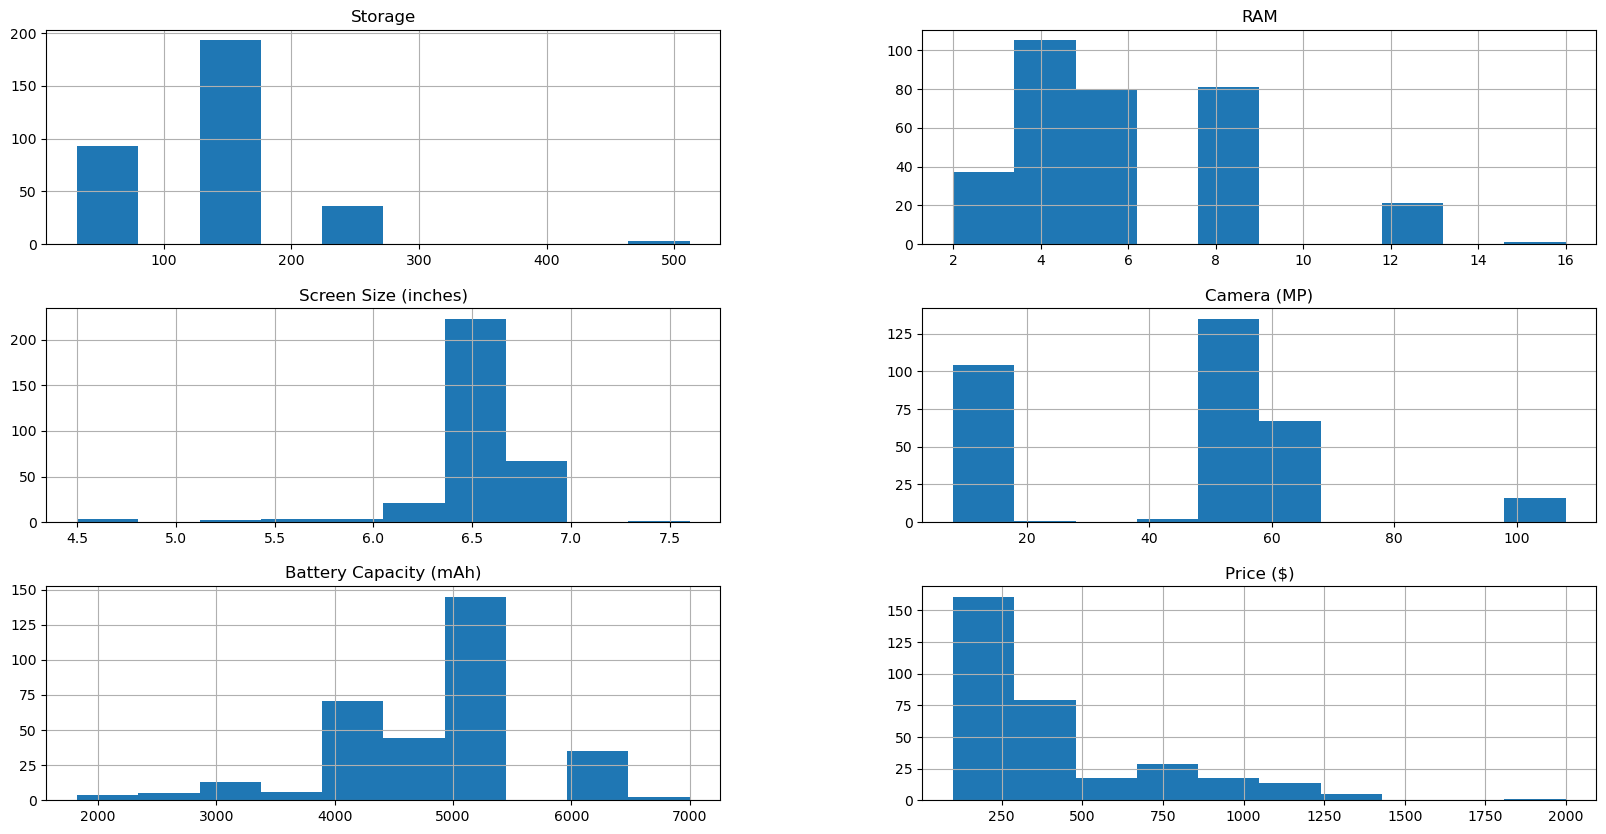

In [29]:
num_features.hist(figsize = (20, 10))

<Axes: >

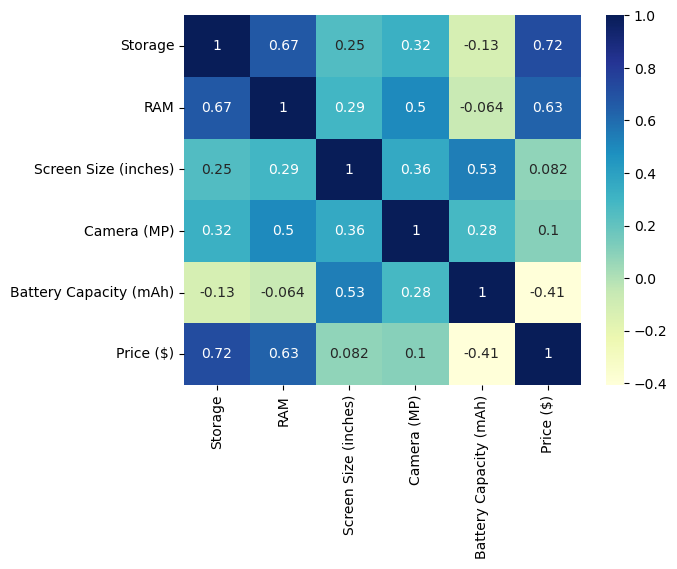

In [30]:
sns.heatmap(num_features.corr(), annot = True, cmap = 'YlGnBu')

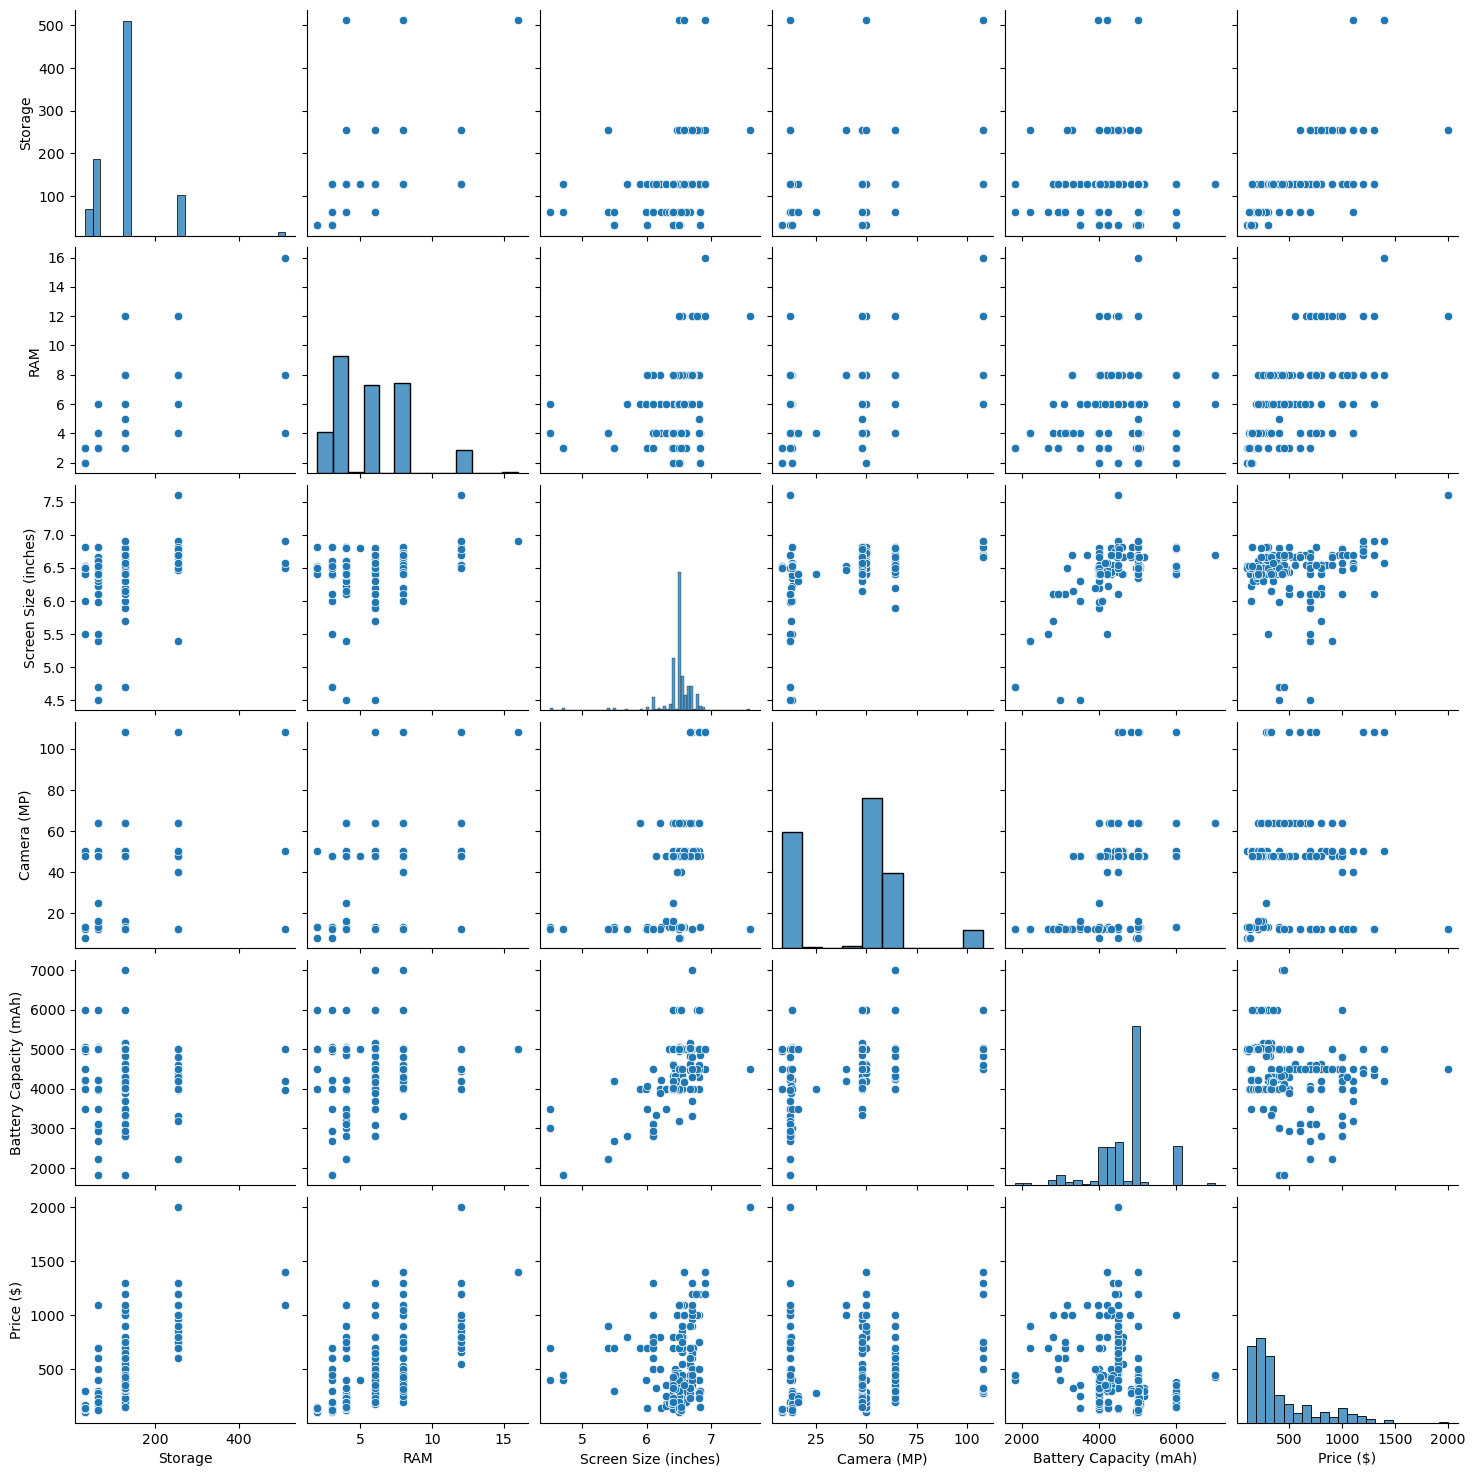

In [31]:
sns.pairplot(df)

In [32]:
pd.get_dummies(df['Brand'])

,Apple,Asus,Blackberry,CAT,Google,Huawei,LG,Motorola,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Vivo,Xiaomi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
402,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df = df.join(pd.get_dummies(df['Brand']))

In [34]:
df.drop('Brand', axis = 1, inplace = True)

In [35]:
df.head()

,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Apple,Asus,Blackberry,CAT,Google,Huawei,LG,Motorola,Nokia,OnePlus,Oppo,Realme,Samsung,Sony,Vivo,Xiaomi
0,128,6,6.10,12.0,3095,999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,256,12,6.80,108.0,5000,1199.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,128,8,6.70,48.0,4500,899.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,128,6,6.67,64.0,5020,279.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,128,8,6.40,50.0,4614,799.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df.columns

Index(['Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)', 'Apple', 'Asus', 'Blackberry',
       'CAT', 'Google', 'Huawei', 'LG', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi'],
      dtype='object')

In [37]:
df.dtypes

Storage                     int32
RAM                         int32
Screen Size (inches)      float64
Camera (MP)               float64
Battery Capacity (mAh)      int64
Price ($)                 float64
Apple                       uint8
Asus                        uint8
Blackberry                  uint8
CAT                         uint8
Google                      uint8
Huawei                      uint8
LG                          uint8
Motorola                    uint8
Nokia                       uint8
OnePlus                     uint8
Oppo                        uint8
Realme                      uint8
Samsung                     uint8
Sony                        uint8
Vivo                        uint8
Xiaomi                      uint8
dtype: object

<Axes: >

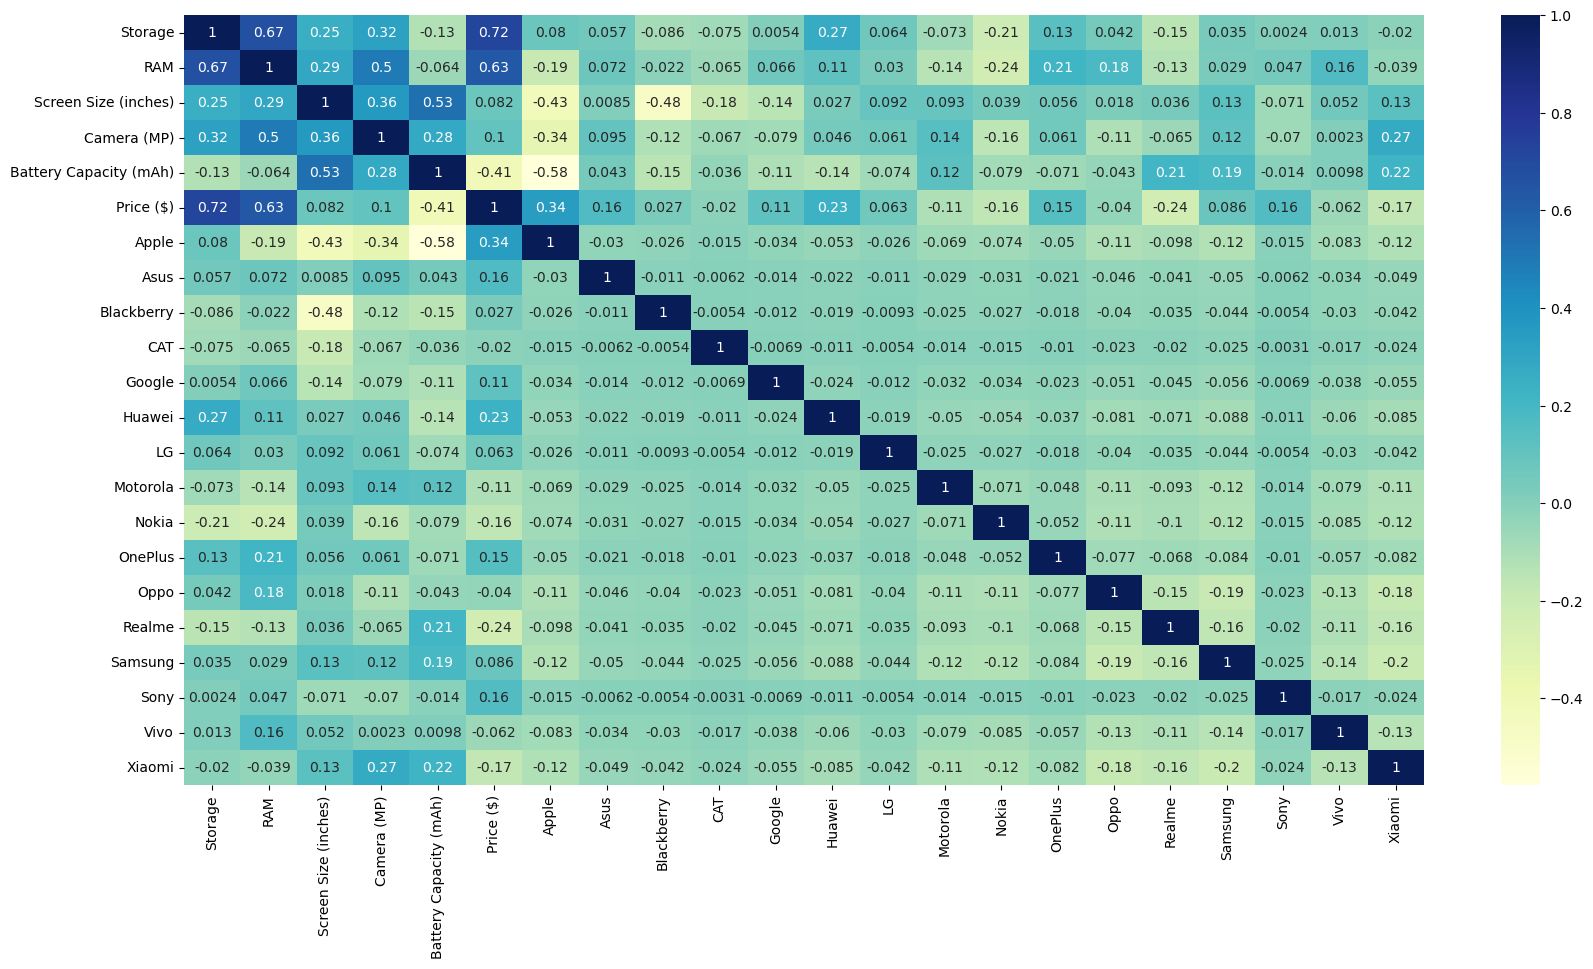

In [38]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [39]:
from sklearn.model_selection import train_test_split

x = df.drop(['Price ($)'], axis = 1)
y = df['Price ($)']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg = LinearRegression()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

reg.fit(x_train, y_train)

LinearRegression()

In [45]:
print(reg.coef_)

[ 94.98550082 143.21923398  97.0833874  -49.13215292 -64.94395001
  92.21906157  44.39361614  52.72705553  24.12816968  28.82607805
  20.0958992   -3.08493215  -0.66857069  -8.35784778  -3.44465283
 -47.0851732  -33.00355943  24.34022645  48.67178188 -48.09855761
 -27.98000868]
414.6923076923077


In [46]:
print(reg.intercept_)

414.6923076923077


In [49]:
y_pred=reg.predict(x_test)

In [50]:
y_pred

array([ 269.20045977,  336.42513155,  232.67760927,  923.1129792 ,
        324.62013864,  102.11013937,  100.19534754,  180.3834362 ,
        351.78670145,  180.85212567,  413.47966281,  449.35617034,
        127.71640587,  286.59165443,  800.5718154 ,  466.9291682 ,
        160.63932769,  414.69842838,  179.89399671,  275.54302937,
        432.46987401,  273.93062602, 1085.60665027,  215.43214185,
        -16.60130541,  941.18234928,   60.92661284,  414.69842838,
         94.81221207,  146.57463468,  269.20045977,  376.52545822,
        175.05921212,  832.02535489,  376.54820285,  519.28921462,
       1118.01464254, 1059.53156765,  245.28474299,  344.21290398,
        672.87095191,  127.71640587,   35.17428028,  776.17296147,
       1585.05961936,  336.75822418, 1126.20578744,  376.52545822,
        561.63874742,  324.62013864,  321.10356481,  210.03208432,
        583.46117222,  127.71640587,  369.21154982,  344.21290398,
        241.97329833,  700.03107223,  278.22903586,  337.36367

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

15324.287563930367
90.69889460768758
123.79130649577283


In [53]:
from sklearn.metrics import r2_score

In [54]:
score=r2_score(y_test,y_pred)
print(score)

0.873170064508739
